In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [63]:
raw_data_path = os.path.join(os.path.pardir,'data','raw','DataFiles')

ncaa_tourney_compact = os.path.join(raw_data_path, 'NCAATourneyCompactResults.csv')
ncaa_tourney_detailed = os.path.join(raw_data_path, 'NCAATourneyDetailedResults.csv')
ncaa_tourney_seeds2018 = os.path.join(os.path.join(os.path.pardir,'data','raw','SampleTourney2018'), 'NCAATourneySeeds_SampleTourney2018.csv')

#reg_season_compact = os.path.join(raw_data_path, 'RegularSeasonCompactResults.csv')
reg_season_compact = os.path.join(os.path.join(os.path.pardir,'data','raw','PrelimData2018'), 'RegularSeasonCompactResults_Prelim2018.csv')
reg_season_detailed = os.path.join(os.path.join(os.path.pardir,'data','raw','PrelimData2018'), 'RegularSeasonDetailedResults_Prelim2018.csv')

teams = os.path.join(raw_data_path, 'Teams.csv')

sample_sub = os.path.join(os.path.pardir,'data','raw','SampleSubmissionStage1.csv')
sample_sub2 = os.path.join(os.path.pardir,'data','raw','SampleSubmissionStage2.csv')

df_ncaa_tourney_compact = pd.read_csv(ncaa_tourney_compact)
df_ncaa_tourney_detailed = pd.read_csv(ncaa_tourney_detailed)

df_seeds = pd.read_csv(ncaa_tourney_seeds2018)

df_reg_season_compact = pd.read_csv(reg_season_compact)
df_reg_season_detailed = pd.read_csv(reg_season_detailed)

df_teams = pd.read_csv(teams)

df_sample_sub = pd.read_csv(sample_sub)
df_sample_sub2 = pd.read_csv(sample_sub2)

In [64]:
win_stats = df_reg_season_detailed.loc[:,['Season','WTeamID','WScore','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
los_stats = df_reg_season_detailed.loc[:,['Season','LTeamID','LScore','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]

In [65]:
win_stats.rename(columns={'WTeamID':'TeamID','WScore':'Score','WFGM':'FGM','WFGA':'FGA','WFGM3':'FGM3','WFGA3':'FGA3','WFTM':'FTM','WFTA':'FTA','WOR':'OR','WDR':'DR','WAst':'AST','WTO':'TO','WStl':'STL','WBlk':'BLK','WPF':'PF'},inplace=True)
los_stats.rename(columns={'LTeamID':'TeamID','LScore':'Score','LFGM':'FGM','LFGA':'FGA','LFGM3':'FGM3','LFGA3':'FGA3','LFTM':'FTM','LFTA':'FTA','LOR':'OR','LDR':'DR','LAst':'AST','LTO':'TO','LStl':'STL','LBlk':'BLK','LPF':'PF'},inplace=True)

In [66]:
team_stats = pd.concat([win_stats,los_stats])

In [67]:
# Field Goal Percentage
team_stats['FGP'] = team_stats.FGM / team_stats.FGA

# 2-pt Field Goal Percentage
team_stats['FGP2'] = (team_stats.FGM - team_stats.FGM3) / (team_stats.FGA - team_stats.FGA3)

# 3-pt Field Goal Percentage
team_stats['FGP3'] = team_stats.FGM3 / team_stats.FGA3

# Free-Throw Percentage
team_stats['FTP'] = team_stats.FTM / team_stats.FTA

In [68]:
team_stats.drop(labels=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'], inplace=True, axis=1)

In [69]:
# Field Goal Percentage
df_reg_season_detailed['WFGP'] = df_reg_season_detailed.WFGM / df_reg_season_detailed.WFGA
df_reg_season_detailed['LFGP'] = df_reg_season_detailed.LFGM / df_reg_season_detailed.LFGA

# 2-pt Field Goal Percentage
df_reg_season_detailed['WFGP2'] = (df_reg_season_detailed.WFGM - df_reg_season_detailed.WFGM3) / (df_reg_season_detailed.WFGA - df_reg_season_detailed.WFGA3)
df_reg_season_detailed['LFGP2'] = (df_reg_season_detailed.LFGM - df_reg_season_detailed.LFGM3) / (df_reg_season_detailed.LFGA - df_reg_season_detailed.LFGA3)

# 3-pt Field Goal Percentage
df_reg_season_detailed['WFGP3'] = df_reg_season_detailed.WFGM3 / df_reg_season_detailed.WFGA3
df_reg_season_detailed['LFGP3'] = df_reg_season_detailed.LFGM3 / df_reg_season_detailed.LFGA3

# Free-Throw Percentage
df_reg_season_detailed['WFTP'] = df_reg_season_detailed.WFTM / df_reg_season_detailed.WFTA
df_reg_season_detailed['LFTP'] = df_reg_season_detailed.LFTM / df_reg_season_detailed.LFTA

# Offensive Rebound Percentage
df_reg_season_detailed['WORP'] = df_reg_season_detailed.WOR / (df_reg_season_detailed.WOR + df_reg_season_detailed.LDR)
df_reg_season_detailed['LORP'] = df_reg_season_detailed.LOR / (df_reg_season_detailed.LOR + df_reg_season_detailed.WDR)

# Defensive Rebound Percentage
df_reg_season_detailed['WDRP'] = df_reg_season_detailed.WDR / (df_reg_season_detailed.WDR + df_reg_season_detailed.LOR)
df_reg_season_detailed['LDRP'] = df_reg_season_detailed.LDR / (df_reg_season_detailed.LDR + df_reg_season_detailed.WOR)

In [76]:
def get_year_t1_t2(ID):
    return (int(x) for x in ID.split('_'))

In [103]:
mask = (df_seeds['TeamID'].values == 1104) & (df_seeds['Season'] == 2018)
int(df_seeds[mask].Seed.values[0][1:3])

9

In [110]:
def get_seed_diff(WTeamID,LTeamID,Season):
    win_mask = (df_seeds['TeamID'].values == WTeamID) & (df_seeds['Season'] == Season)
    if df_seeds[win_mask].empty:
        win_seed = 0
    else:
        win_seed = int(df_seeds[win_mask].Seed.values[0][1:3])
    
    los_mask = (df_seeds['TeamID'].values == LTeamID) & (df_seeds['Season'] == Season)
    if df_seeds[los_mask].empty:
        los_seed = 0
    else:
        los_seed = int(df_seeds[los_mask].Seed.values[0][1:3])
        
    return win_seed - los_seed

### Create training data with winning and losing median reg. season stats containing regular and inverted results

In [111]:
df_win_train = pd.DataFrame(columns=['AFGP','BFGP','AFGP2','BFGP2','AFGP3','BFGP3','AFTP','BFTP','AOR','BOR','ADR','BDR','AAST','BAST','ATO','BTO','ASTL','BSTL','ABLK','BBLK','APF','BPF','AWP','BWP','SDDF','Result'])
df_los_train = pd.DataFrame(columns=['AFGP','BFGP','AFGP2','BFGP2','AFGP3','BFGP3','AFTP','BFTP','AOR','BOR','ADR','BDR','AAST','BAST','ATO','BTO','ASTL','BSTL','ABLK','BBLK','APF','BPF','AWP','BWP','SDDF','Result'])

i = 0
for ii, row in df_ncaa_tourney_compact[(df_ncaa_tourney_compact.Season >= 2003) & (df_ncaa_tourney_compact.Season < 2018)].iterrows():
    t1_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FGP.median()
    t2_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FGP.median()

    t1_fgp2 = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FGP2.median()
    t2_fgp2 = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FGP2.median()
    
    t1_fgp3 = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FGP3.median()
    t2_fgp3 = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FGP3.median()
    
    t1_ftp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FTP.median()
    t2_ftp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FTP.median()
    
    t1_or = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].OR.median()
    t2_or = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].OR.median()
    
    t1_dr = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].DR.median()
    t2_dr = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].DR.median()
    
    t1_ast = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].AST.median()
    t2_ast = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].AST.median()
    
    t1_to = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].TO.median()
    t2_to = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].TO.median()
    
    t1_stl = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].STL.median()
    t2_stl = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].STL.median()
    
    t1_blk = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].BLK.median()
    t2_blk = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].BLK.median()
    
    t1_pf = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].PF.median()
    t2_pf = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].PF.median()
    
    t1_wp = win_stats[(win_stats.TeamID == row.WTeamID) & (win_stats.Season == row.Season)].shape[0] / (win_stats[(win_stats.TeamID == row.WTeamID) & (win_stats.Season == row.Season)].shape[0] + los_stats[(los_stats.TeamID == row.WTeamID) & (los_stats.Season == row.Season)].shape[0])
    t2_wp = win_stats[(win_stats.TeamID == row.LTeamID) & (win_stats.Season == row.Season)].shape[0] / (win_stats[(win_stats.TeamID == row.LTeamID) & (win_stats.Season == row.Season)].shape[0] + los_stats[(los_stats.TeamID == row.LTeamID) & (los_stats.Season == row.Season)].shape[0])
               
    seed_diff = get_seed_diff(row.WTeamID,row.LTeamID,row.Season)
        
    df_win_train.loc[i] = [t1_fgp,t2_fgp,t1_fgp2,t2_fgp2,t1_fgp3,t2_fgp3,t1_ftp,t2_ftp,t1_or,t2_or,t1_dr,t2_dr,t1_ast,t2_ast,t1_to,t2_to,t1_stl,t2_stl,t1_blk,t2_blk,t1_pf,t2_pf,t1_wp,t2_wp,seed_diff,1]
    df_los_train.loc[i] = [t2_fgp,t1_fgp,t2_fgp2,t1_fgp2,t2_fgp3,t1_fgp3,t2_ftp,t1_ftp,t2_or,t1_or,t2_dr,t1_dr,t2_ast,t1_ast,t2_to,t1_to,t2_stl,t1_stl,t2_blk,t1_blk,t2_pf,t1_pf,t2_wp,t1_wp,-seed_diff,0]
    
    i=i+1

### Create test data using 2018 reg. season stats and team in submission file

In [112]:
X_test = pd.DataFrame(columns=['AFGP','BFGP','AFGP2','BFGP2','AFGP3','BFGP3','AFTP','BFTP','AOR','BOR','ADR','BDR','AAST','BAST','ATO','BTO','ASTL','BSTL','ABLK','BBLK','APF','BPF','AWP','BWP','SDDF'])
y_test = pd.DataFrame(columns=['Result'])

i = 0
for ii, row in df_sample_sub2.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    
    t1_fgp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].FGP.median()
    t2_fgp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].FGP.median()
    
    t1_fgp2 = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].FGP2.median()
    t2_fgp2 = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].FGP2.median()
    
    t1_fgp3 = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].FGP3.median()
    t2_fgp3 = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].FGP3.median()
    
    t1_ftp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].FTP.median()
    t2_ftp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].FTP.median()
    
    t1_or = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].OR.median()
    t2_or = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].OR.median()
    
    t1_dr = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].DR.median()
    t2_dr = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].DR.median()
    
    t1_ast = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].AST.median()
    t2_ast = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].AST.median()
    
    t1_to = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].TO.median()
    t2_to = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].TO.median()
    
    t1_stl = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].STL.median()
    t2_stl = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].STL.median()
    
    t1_blk = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].BLK.median()
    t2_blk = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].BLK.median()
    
    t1_pf = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].PF.median()
    t2_pf = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].PF.median()
    
    t1_wp = win_stats[(win_stats.TeamID == t1) & (win_stats.Season == year)].shape[0] / (win_stats[(win_stats.TeamID == t1) & (win_stats.Season == year)].shape[0] + los_stats[(los_stats.TeamID == t1) & (los_stats.Season == year)].shape[0])
    t2_wp = win_stats[(win_stats.TeamID == t2) & (win_stats.Season == year)].shape[0] / (win_stats[(win_stats.TeamID == t2) & (win_stats.Season == year)].shape[0] + los_stats[(los_stats.TeamID == t2) & (los_stats.Season == year)].shape[0])
        
    seed_diff = get_seed_diff(t1,t2,year)
        
    X_test.loc[i] = [t1_fgp,t2_fgp,t1_fgp2,t2_fgp2,t1_fgp3,t2_fgp3,t1_ftp,t2_ftp,t1_or,t2_or,t1_dr,t2_dr,t1_ast,t2_ast,t1_to,t2_to,t1_stl,t2_stl,t1_blk,t2_blk,t1_pf,t2_pf,t1_wp,t2_wp,seed_diff]
    y_test.loc[i] = 0.5
    
    i=i+1    

In [113]:
df_predictions = pd.concat((df_win_train, df_los_train))

X_train = df_predictions.loc[:,df_predictions.columns != 'Result']
y_train = df_predictions.Result.values.astype('float')

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=0)

params = {'C' : np.logspace(start=-20, stop=20, num=20)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-20, 1.27427e-18, 1.62378e-16, 2.06914e-14, 2.63665e-12,
       3.35982e-10, 4.28133e-08, 5.45559e-06, 6.95193e-04, 8.85867e-02,
       1.12884e+01, 1.43845e+03, 1.83298e+05, 2.33572e+07, 2.97635e+09,
       3.79269e+11, 4.83293e+13, 6.15848e+15, 7.84760e+17, 1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [115]:
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.5524, with best C: 11.288378916846836


In [116]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)

df_sample_sub2.Pred = clipped_preds
df_sample_sub2.tail()

,ID,Pred
2273,2018_1452_1460,0.876445
2274,2018_1452_1462,0.470243
2275,2018_1455_1460,0.831614
2276,2018_1455_1462,0.381958
2277,2018_1460_1462,0.111218


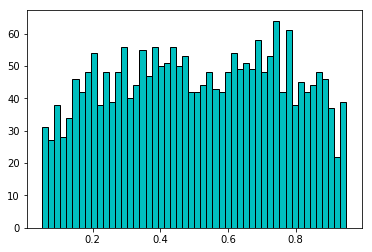

In [117]:
plt.hist(clipped_preds, bins=50, color='c', edgecolor='black');

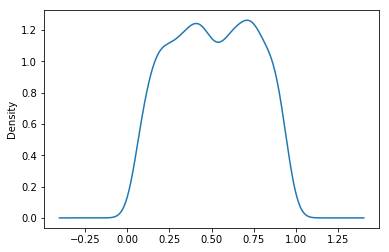

In [118]:
df_sample_sub2.Pred.plot.kde();

In [119]:
df_results = pd.DataFrame(columns=['WTeam','LTeam','Prob'])

i = 0
for ii, row in df_sample_sub2.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    
    df_results.loc[i] = [df_teams[df_teams.TeamID == t1].TeamName.values[0],df_teams[df_teams.TeamID == t2].TeamName.values[0],row.Pred]
    i=i+1

In [120]:
df_results.to_csv('second_log_reg_results2.csv', index=False)